Install the XGBoost

In [ ]:
!pip install xgboost

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Create variable to address where the files are located
path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - Smartphone/'
# Create dataframe using Pandas
df = pd.read_excel(f'{path}gsmarena.xlsx',sheet_name='clean')
# Rename the unnamed column
df.rename(columns={'Unnamed: 24':'frontcam'},inplace=True)

In [ ]:
# Create two variables of list which contain the name of columns which then divided into 2, categorical and numerical
cat_col = ['announced','status', 'launch', 'year', 'network', 'dimension',\
           'battery', 'battery_type', 'screen_ratio', 'resolution', 'os', 'chipset', 'cpu', 'gpu', 'nfc', 'usb']
num_col = ['price', 'weight', 'battery_capacity', 'screen', 'pixel_density', 'storage', 'RAM', 'maincam', 'frontcam']

In [ ]:
# Create an instance for data imputation for categorical using SimpleImputer with the most frequent value is the strategy
cat_imp = SimpleImputer(strategy='most_frequent')
# For numerical value using KNNImputer which will cluster the value and then pick the closest to 4 neighbors
num_imp = KNNImputer(n_neighbors=4)

In [ ]:
# Loop through the list categorical columns
for x in cat_col:
  # Start imputing using SimpleImputer
  # Because the returned value from SimpleImputer is an array we need to reshaped the value to (-1,1)
  df[x] = cat_imp.fit_transform(df[x].values.reshape(-1,1))[:,0]
# Imputing for numerical columns (KNNImputer is multivariate so it can do multiple columns to find the closest value)
df[num_col] = num_imp.fit_transform(df[num_col])

In [ ]:
# Uncomment and run the line of code below to save it into CSV
# df.to_csv(f'{path}clean_gsmarena.csv',index=False)

In [ ]:
# Create a new column which take the value from network column that already been splitted using / separator and take only the last value
series = df['network'].str.split('/')
df['connection'] = series.apply(lambda x: x[-1])

In [ ]:
# Create features variable which just the name of the columns used for training the model
feature = ['brand', 'year','connection', 'weight', 'battery',\
           'battery_capacity','battery_type','screen', 'pixel_density',\
           'storage', 'RAM', 'cpu', 'maincam', 'frontcam','nfc']
# create variable X which also One-hot encoding dataframe the categorical columns
X = pd.get_dummies(df[feature])
# Target varuable
y = df['price']
# split the data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [ ]:
# define the model and fit training data into it
reg = XGBRegressor()
reg.fit(X_train,y_train)

In [ ]:
# create prediction
prediction = reg.predict(X_test)

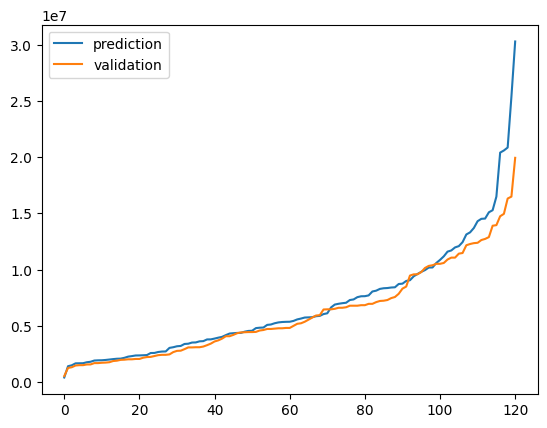

In [ ]:
# plot the result of prediction and validation
plt.plot(sorted(prediction),label='prediction')
plt.plot(sorted(y_test),label='validation')

plt.legend()

In [ ]:
# Uncomment and run line of code below to save the model
# joblib.dump(reg,f'{path}regressorModel')

['/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project - Smartphone/regressorModel']